<a href="https://colab.research.google.com/github/bkvkrll/Theory-of-Probability-and-Mathematical-Statistics/blob/main/lesson7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import linregress
%matplotlib inline

Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать максимальный R2. Например, берем признак х1 и х3 и строим модель y = b0 + b1 * x1 + b2 * x3, затем признаки x2 и x1 и тд
Является ли значимым получившееся уравнение регрессии?

In [52]:
x = pd.DataFrame([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = pd.DataFrame([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])
x1=x[0]
x2=x[1]
x3=x[2]
x4=x[3]


In [53]:
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [54]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [55]:
#Парная регрессия
b1 = (np.mean(salary * scoring ) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
print(f'Коэффицент b1 равен {b1}')
b0 = np.mean(scoring) - b1 * np.mean(salary)
print(f'Коэффицент b0 равен {b0}')

Коэффицент b1 равен 2.620538882402765
Коэффицент b0 равен 444.1773573243596


In [56]:
#Метод наименьших квадратов
x2 = pd.DataFrame(salary)
y2 = pd.DataFrame(scoring)
x2.shape
a = np.ones((x2.shape[0], 1))
x2 = np.hstack((a, x2))
x2.shape
XTX = x2.T.dot(x2)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
print(b)

[[444.17735732]
 [  2.62053888]]


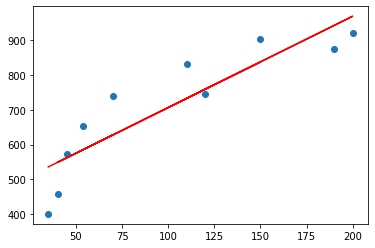

In [57]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red')

In [58]:
pred_scoring = b0 + b1 * salary
R1 = pred_scoring.var() / scoring.var()
print(f'Коэффициент детерминации: {R1}')

Коэффициент детерминации: 0.7876386635293678


In [59]:
k1 = 1
k2 = salary.shape[0] - k1 -1
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [60]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714